## Parse Data

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def list_to_plate(lst: pd.Series, num_col=None) -> pd.DataFrame:
    new_index = pd.MultiIndex.from_tuples([(i[0], int(i[1:])) for i in lst.index])
    plate =  pd.Series(lst.values, index=new_index).unstack()
    if num_col:
      plate = plate.reindex(columns=range(1, num_col + 1), fill_value=pd.NA)
    return plate

def plate_to_list(plate: pd.DataFrame) -> pd.Series:
    s = plate.stack()
    s.index = [f'{row}{col}' for row, col in s.index]
    return s

def set_plate_axes(df: pd.DataFrame) -> pd.DataFrame:
    """ Given a dataframe representing a multiwell plate, set axes to be proper plate axes. """

    df.columns = range(1, len(df.columns)+1)
    df.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'][:len(df.index)]
    return df

def bars(df, **kwargs):
    ax = sns.barplot(data=df,alpha=0.8, **kwargs)
    ax = sns.stripplot(data=df, ax=ax, size=6, dodge=True, legend=False,  edgecolor='black', linewidth=1, **kwargs)
    if 'hue' in kwargs.keys():
      plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    return ax


In [39]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from pathlib import Path
DRIVE_FOLDER = Path('/content/drive/Shared drives/Student Biolab Zurich/iDEC/iDEC 2024/Lab results/Phage Propagation Assays/20240909_logic_validation')


cts = pd.read_csv(DRIVE_FOLDER / '20240909_iDEC_prop_assay_repeat.txt', sep='\t', header=1)[['Pos', 'Cp']]
cts = list_to_plate(cts.set_index('Pos').Cp, num_col=24).drop('L')
layout_plate1 = pd.read_excel(DRIVE_FOLDER / 'layout_plate_1.xlsx', header=None)
layout_plate2 = pd.read_excel(DRIVE_FOLDER / 'layout_plate_2.xlsx', header=None)




Mounted at /content/drive


In [40]:
cts

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
A,26.52,26.13,25.53,<NA>,27.44,27.02,27.49,<NA>,27.82,28.09,...,<NA>,28.56,27.97,<NA>,28.52,28.55,<NA>,29.51,30.48,<NA>
C,27.13,26.00,27.23,<NA>,27.69,27.74,28.85,<NA>,28.28,28.08,...,<NA>,29.13,35.00,<NA>,28.82,28.94,<NA>,29.57,29.22,<NA>
E,25.22,24.87,25.63,<NA>,27.97,27.80,27.74,<NA>,28.19,27.67,...,<NA>,29.00,28.60,<NA>,28.73,28.91,<NA>,29.68,29.86,<NA>
G,26.81,26.90,26.41,<NA>,28.72,26.62,27.79,<NA>,28.64,28.14,...,<NA>,28.58,28.86,<NA>,28.80,29.27,<NA>,29.77,29.32,<NA>
I,25.57,25.45,25.80,<NA>,27.95,26.85,27.98,<NA>,28.01,27.56,...,<NA>,29.09,28.74,<NA>,35.00,28.91,<NA>,29.95,28.46,<NA>
K,27.55,28.08,27.77,<NA>,29.19,29.45,24.99,<NA>,24.76,24.61,...,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>
M,26.01,25.43,26.13,<NA>,27.61,28.56,26.84,<NA>,28.62,28.25,...,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>
O,12.47,11.95,11.96,<NA>,11.87,13.50,11.82,<NA>,14.20,13.94,...,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,<NA>


In [41]:
cts_plate1 = plate_to_list(set_plate_axes(cts.iloc[::1, :12])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate1['plate'] = 'plate1'
cts_plate2 = plate_to_list(set_plate_axes(cts.iloc[::1, 9:24])).reset_index().rename(columns={0: 'cp', 'index': 'well'})
cts_plate2['plate'] = 'plate2'

cts_all = pd.concat([cts_plate1, cts_plate2])
cts_all

,well,cp,plate
0,A1,26.52,plate1
1,A2,26.13,plate1
2,A3,25.53,plate1
3,A5,27.44,plate1
4,A6,27.02,plate1
...,...,...,...
55,G2,27.89,plate2
56,G4,30.22,plate2
57,G5,29.89,plate2
58,H1,13.94,plate2


In [42]:
def parse_plate(df, num_cols):
  pass

def parse_layout(layout: pd.DataFrame):
  idx = 0
  plates = []
  while idx < len(layout.index)-9:
    if layout.iloc[idx, 0] is not None:
      plate = set_plate_axes(layout.iloc[idx+2:idx+2+8, 1:1+12])
      print(plate)
      plate = plate_to_list(plate)
      plate.name = layout.iloc[idx,  0]
      plates.append(plate)
      idx += 11
    else:
      idx += 1
  return pd.concat(plates, axis=1)

meta_plate1 = parse_layout(layout_plate1).reset_index().rename(columns={'index': 'well'})
meta_plate1['plate'] = 'plate1'

meta_plate2 = parse_layout(layout_plate2).reset_index().rename(columns={'index': 'well'})
meta_plate2['plate'] = 'plate2'

meta = pd.concat([meta_plate1, meta_plate2]) # this only works becase meta columns are the same, which won't be the case all the time
meta

            1            2            3   4            5            6   \
A  1076-37-DP6  1076-37-DP6  1076-37-DP6 NaN  1076-37-DP6  1076-37-DP6   
B  1081-37-DP6  1081-37-DP6  1081-37-DP6 NaN  1081-37-DP6  1081-37-DP6   
C  1097-37-DP6  1097-37-DP6  1097-37-DP6 NaN  1097-37-DP6  1097-37-DP6   
D  1112-37-DP6  1112-37-DP6  1112-37-DP6 NaN  1112-37-DP6  1112-37-DP6   
E  1113-37-DP6  1113-37-DP6  1113-37-DP6 NaN  1113-37-DP6  1113-37-DP6   
F           LB           LB           LB NaN           LB           LB   
G        S2060        S2060        S2060 NaN        S2060        S2060   
H        S2208        S2208        S2208 NaN        S2208        S2208   

            7   8            9            10           11  12  
A  1076-37-DP6 NaN  1076-37-DP6  1076-37-DP6  1076-37-DP6 NaN  
B  1081-37-DP6 NaN  1081-37-DP6  1081-37-DP6  1081-37-DP6 NaN  
C  1097-37-DP6 NaN  1097-37-DP6  1097-37-DP6  1097-37-DP6 NaN  
D  1112-37-DP6 NaN  1112-37-DP6  1112-37-DP6  1112-37-DP6 NaN  
E  1113-37-DP

,well,strain,Phage,promoter,plate
0,A1,1076-37-DP6,SIAH1,uninduced,plate1
1,A2,1076-37-DP6,SIAH1,uninduced,plate1
2,A3,1076-37-DP6,SIAH1,uninduced,plate1
3,A5,1076-37-DP6,SIAH2,uninduced,plate1
4,A6,1076-37-DP6,SIAH2,uninduced,plate1
...,...,...,...,...,...
35,E5,1113-37-DP6,SIAH2,induced,plate2
36,E7,1113-37-DP6,TadA,induced,plate2
37,E8,1113-37-DP6,TadA,induced,plate2
38,E10,1113-37-DP6,no phages,induced,plate2


In [43]:
layout_plate1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,strain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1,2,3,4.0,5,6,7,8.0,9,10,11,12.0
2,A,1076-37-DP6,1076-37-DP6,1076-37-DP6,NaN,1076-37-DP6,1076-37-DP6,1076-37-DP6,NaN,1076-37-DP6,1076-37-DP6,1076-37-DP6,NaN
3,B,1081-37-DP6,1081-37-DP6,1081-37-DP6,NaN,1081-37-DP6,1081-37-DP6,1081-37-DP6,NaN,1081-37-DP6,1081-37-DP6,1081-37-DP6,NaN
4,C,1097-37-DP6,1097-37-DP6,1097-37-DP6,NaN,1097-37-DP6,1097-37-DP6,1097-37-DP6,NaN,1097-37-DP6,1097-37-DP6,1097-37-DP6,NaN
5,D,1112-37-DP6,1112-37-DP6,1112-37-DP6,NaN,1112-37-DP6,1112-37-DP6,1112-37-DP6,NaN,1112-37-DP6,1112-37-DP6,1112-37-DP6,NaN
6,E,1113-37-DP6,1113-37-DP6,1113-37-DP6,NaN,1113-37-DP6,1113-37-DP6,1113-37-DP6,NaN,1113-37-DP6,1113-37-DP6,1113-37-DP6,NaN
7,F,LB,LB,LB,NaN,LB,LB,LB,NaN,LB,LB,LB,NaN
8,G,S2060,S2060,S2060,NaN,S2060,S2060,S2060,NaN,S2060,S2060,S2060,NaN
9,H,S2208,S2208,S2208,NaN,S2208,S2208,S2208,NaN,S2208,S2208,S2208,NaN


In [44]:
df = pd.merge(cts_all, meta, on=['well', 'plate'])
df

,well,cp,plate,strain,Phage,promoter
0,A1,26.52,plate1,1076-37-DP6,SIAH1,uninduced
1,A2,26.13,plate1,1076-37-DP6,SIAH1,uninduced
2,A3,25.53,plate1,1076-37-DP6,SIAH1,uninduced
3,A5,27.44,plate1,1076-37-DP6,SIAH2,uninduced
4,A6,27.02,plate1,1076-37-DP6,SIAH2,uninduced
...,...,...,...,...,...,...
107,E5,25.6,plate2,1113-37-DP6,SIAH2,induced
108,E7,29.09,plate2,1113-37-DP6,TadA,induced
109,E8,28.74,plate2,1113-37-DP6,TadA,induced
110,E10,35.0,plate2,1113-37-DP6,no phages,induced


In [45]:
meta.promoter.unique()

array(['uninduced', 'induced'], dtype=object)

## Compute Propagation

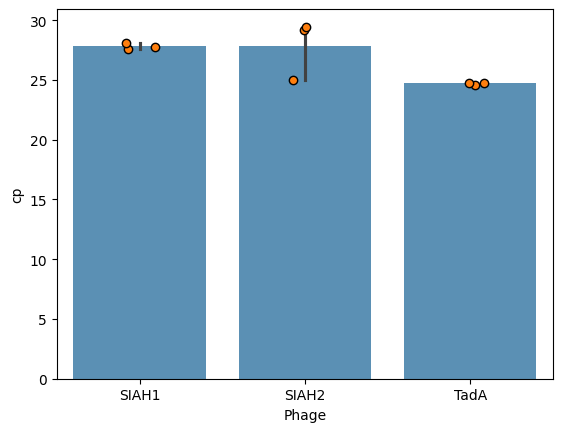

In [46]:
import seaborn as sns

_ = bars(df[df.strain == 'LB'], x='Phage', y='cp')

In [47]:
df[df.strain == 'LB']

,well,cp,plate,strain,Phage,promoter
45,F1,27.55,plate1,LB,SIAH1,uninduced
46,F2,28.08,plate1,LB,SIAH1,uninduced
47,F3,27.77,plate1,LB,SIAH1,uninduced
48,F5,29.19,plate1,LB,SIAH2,uninduced
49,F6,29.45,plate1,LB,SIAH2,uninduced
50,F7,24.99,plate1,LB,SIAH2,uninduced
51,F9,24.76,plate1,LB,TadA,uninduced
52,F10,24.61,plate1,LB,TadA,uninduced
53,F11,24.76,plate1,LB,TadA,uninduced


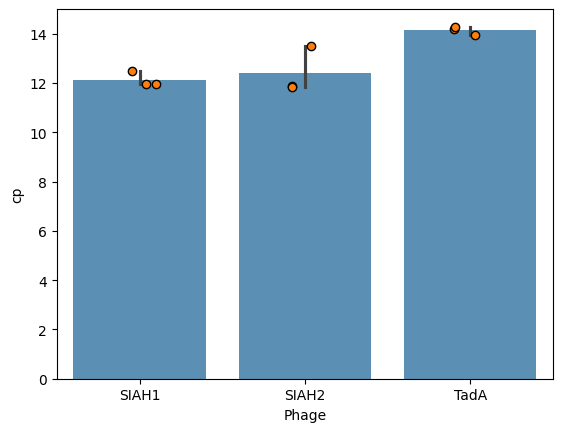

In [48]:
_ = bars(df[df.strain == 'S2208'], x='Phage', y='cp')

In [49]:
df['cp_init'] = pd.NA
for phage in df.Phage.unique():
  df.loc[df.Phage == phage, 'cp_init'] = df[(df.Phage == phage) & (df.strain == 'LB')].cp.mean()

df['fc_log2'] = df.cp_init - df.cp
df['fc'] = 2 ** df.fc_log2
df

,well,cp,plate,strain,Phage,promoter,cp_init,fc_log2,fc
0,A1,26.52,plate1,1076-37-DP6,SIAH1,uninduced,27.8,1.28,2.42839
1,A2,26.13,plate1,1076-37-DP6,SIAH1,uninduced,27.8,1.67,3.182146
2,A3,25.53,plate1,1076-37-DP6,SIAH1,uninduced,27.8,2.27,4.823231
3,A5,27.44,plate1,1076-37-DP6,SIAH2,uninduced,27.876667,0.436667,1.353474
4,A6,27.02,plate1,1076-37-DP6,SIAH2,uninduced,27.876667,0.856667,1.81085
...,...,...,...,...,...,...,...,...,...
107,E5,25.6,plate2,1113-37-DP6,SIAH2,induced,27.876667,2.276667,4.845571
108,E7,29.09,plate2,1113-37-DP6,TadA,induced,24.71,-4.38,0.048027
109,E8,28.74,plate2,1113-37-DP6,TadA,induced,24.71,-4.03,0.061214
110,E10,35.0,plate2,1113-37-DP6,no phages,induced,NaN,NaN,NaN


In [50]:
df.Phage.unique()

array(['SIAH1', 'SIAH2', 'TadA', 'no phages'], dtype=object)

## Results


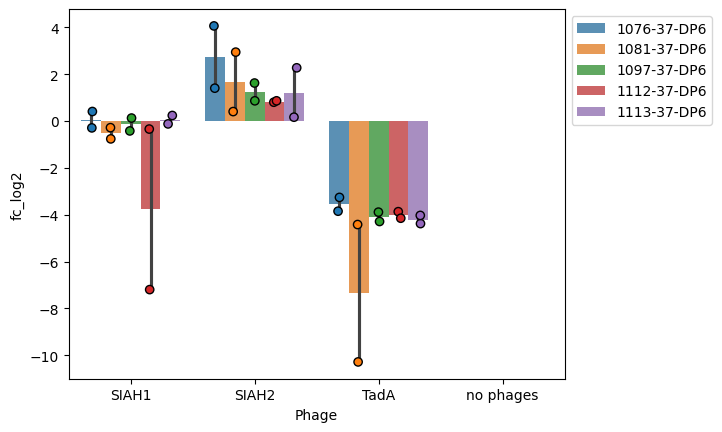

In [51]:
_ = bars(df[(df.strain != 'S2208') & (df.promoter == 'induced')], x='Phage', y='fc_log2', hue='strain')

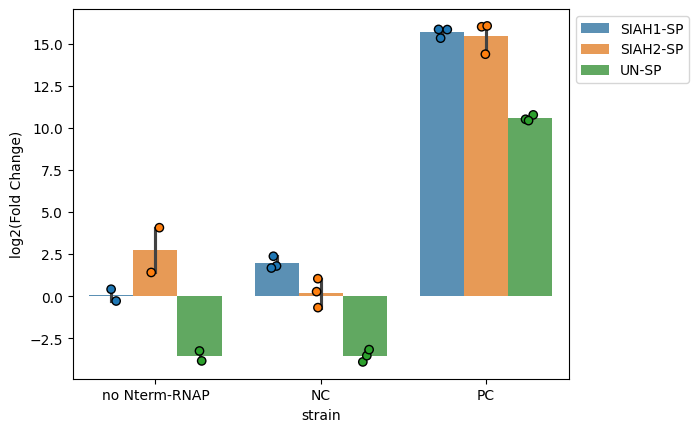

In [61]:
d_no_nterm = df[((df.strain == '1076-37-DP6') & (df.promoter == 'induced')) | (df.strain == 'S2208') | (df.strain == 'S2060')]
d_no_nterm = d_no_nterm[d_no_nterm.Phage != 'no phages']
d_no_nterm.strain = d_no_nterm.strain.map({'S2060': 'NC', 'S2208': 'PC', '1076-37-DP6': 'no Nterm-RNAP'})
d_no_nterm.Phage = d_no_nterm.Phage.map({'SIAH1': 'SIAH1-SP', 'SIAH2': 'SIAH2-SP', 'TadA': 'UN-SP'})
d_no_nterm  = d_no_nterm.rename(columns={'fc_log2': 'log2(Fold Change)'})
ax = bars(d_no_nterm, x='strain', y='log2(Fold Change)', hue='Phage', order=['no Nterm-RNAP', 'NC', 'PC'])
